In [228]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import pandas as pd

In [229]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!

grav_const_in_cgs = G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitLength_in_cm = rgas
unitTime_in_s = (unitLength_in_cm**3/grav_const_in_cgs/UnitMass_in_g)**0.5
unitTime_in_kyr = unitTime_in_s/3600/24/365.25/1000
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

UnitDensity_in_cgs = UnitMass_in_g / unitLength_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs:.2E} g/cm^3')


unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')
print('unitTime_in_kyr = ', unitTime_in_kyr)

UnitDensity_in_cgs = 2.56E-18 g/cm^3
unitVelocity_in_cm_per_s = 37993.6 cm/s
unitTime_in_kyr =  76.73144407493204


In [230]:
j = 589 #589 #480  # 351 ===> 1e-13

filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/GPU_sph/Commercon/200k_eps_0.001/*.csv'))

t = float(filz[j].split('/')[-1][2:-4])
print(f'Time in code unit = {t}')
print(f'Time in kyrs = {t*unitTime_in_kyr:.3f}')

Time in code unit = 1.216283
Time in kyrs = 93.327


In [231]:
df = pd.read_csv(filz[j])

x = df['x'].values
y = df['y'].values
z = df['z'].values

vx = df['vx'].values
vy = df['vy'].values
vz = df['vz'].values

v = np.vstack((vx, vy, vz)).T

h = df['h'].values

rho = df['rho'].values

r = np.vstack((x, y, z)).T

r.shape, v.shape

((200000, 3), (200000, 3))

## Selecting particles in a thin shell parallel to the x-y plane

In [232]:
delta = 0.1

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

rx = x[nz]
ry = y[nz]
rz = z[nz]

vt = v[nz]

69116


(-1.0, 1.0)

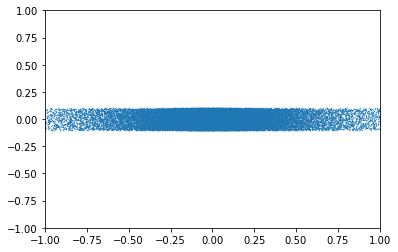

In [233]:
plt.scatter(rx, rz, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [234]:
radius = (rx*rx + ry*ry + rz*rz)**0.5

vr = (vt[:, 0]*rx + vt[:, 1]*ry + vt[:, 2]*rz)/radius

In [235]:
logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

In [236]:
res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(vr[nx])])

res = np.array(res)

In [237]:
R = res[:, 0] * unitLength_in_cm
vr = res[:, 1] * unitVelocity_in_cm_per_s

In [238]:
print(f'Time in code unit = {t}')
print(f'Time in kyrs = {t*unitTime_in_kyr:.3f}')

Time in code unit = 1.216283
Time in kyrs = 93.327


In [239]:
dictx = {'R': R, 'vr': vr}
with open('R_vs_vr_hfvSPH.pkl', 'wb') as f:
    pickle.dump(dictx, f)

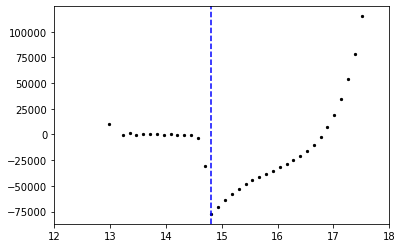

In [240]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k')
plt.axvline(x = 14.8, color = 'blue', linestyle='--')
plt.xlim(12, 18);

In [241]:
np.sort(h)

array([2.62777e-04, 2.63866e-04, 2.63891e-04, ..., 8.37488e-01,
       8.41246e-01, 8.50049e-01])

In [242]:
np.sort(rho)*UnitDensity_in_cgs

array([1.87332887e-23, 1.93693472e-23, 2.00457822e-23, ...,
       1.35822119e-12, 1.35857895e-12, 1.37190066e-12])

In [243]:
np.sort(rho)*UnitDensity_in_cgs

array([1.87332887e-23, 1.93693472e-23, 2.00457822e-23, ...,
       1.35822119e-12, 1.35857895e-12, 1.37190066e-12])